In [48]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from allison.clustering.k_means import Kmeans

In [49]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
def numeric_labels(categorical_labels):
    
    labels=list(set(categorical_labels))
    numeric_labels=[]
    
    for cat_label in categorical_labels:
        if cat_label in labels:
            numeric_labels.append(labels.index(cat_label))
    
    return numeric_labels
            

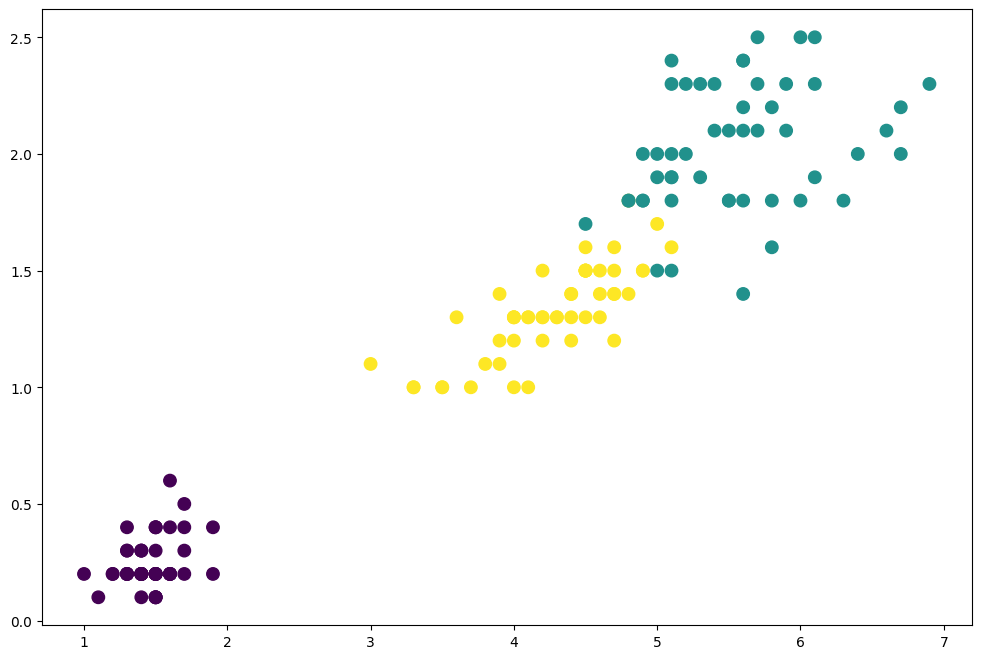

In [51]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=numeric_labels(data['Species']))

In [52]:
features=data[['PetalLengthCm','PetalWidthCm','PetalLengthCm','PetalWidthCm']]
features

,PetalLengthCm,PetalWidthCm,PetalLengthCm,PetalWidthCm
0,1.4,0.2,1.4,0.2
1,1.4,0.2,1.4,0.2
2,1.3,0.2,1.3,0.2
3,1.5,0.2,1.5,0.2
4,1.4,0.2,1.4,0.2
...,...,...,...,...
145,5.2,2.3,5.2,2.3
146,5.0,1.9,5.0,1.9
147,5.2,2.0,5.2,2.0
148,5.4,2.3,5.4,2.3


In [53]:
model= Kmeans(n_centroids=3)

In [54]:
hist_train=model.train(features=features,history_train=True)

Iter: 1 	 ==================================================> 	 moviment: 0.981
Iter: 2 	 ==================================================> 	 moviment: 0.665
Iter: 3 	 ==================================================> 	 moviment: 0.448
Iter: 4 	 ==================================================> 	 moviment: 0.172
Iter: 5 	 ==================================================> 	 moviment: 0.075
Iter: 6 	 ==================================================> 	 moviment: 0.044
Iter: 7 	 ==================================================> 	 moviment: 0.014
Iter: 8 	 ==================================================> 	 moviment: 0.015
Iter: 9 	 ==================================================> 	 moviment: 0.000


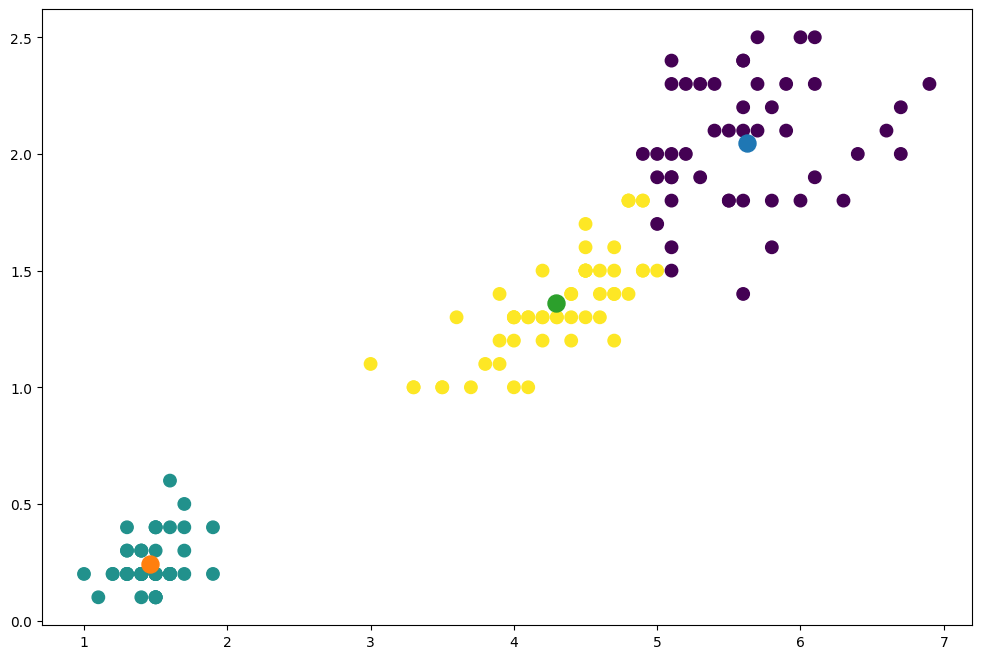

In [55]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=model.labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

In [56]:
model.predict(features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
model.get_distances(features)

array([[6.52292453, 0.10983624, 4.40703391],
       [6.52292453, 0.10983624, 4.40703391],
       [6.65274223, 0.2401333 , 4.53861046],
       [6.39359911, 0.080399  , 4.27608592],
       [6.52292453, 0.10983624, 4.40703391],
       [6.02154293, 0.40007999, 3.90940269],
       [6.46756631, 0.12026637, 4.35640266],
       [6.39359911, 0.080399  , 4.27608592],
       [6.52292453, 0.10983624, 4.40703391],
       [6.45269247, 0.20991427, 4.33227591],
       [6.39359911, 0.080399  , 4.27608592],
       [6.26479647, 0.20214846, 4.14582607],
       [6.5808567 , 0.22285421, 4.46157501],
       [6.96842731, 0.55359191, 4.85353095],
       [6.78302396, 0.37850231, 4.67076246],
       [6.28329919, 0.22641555, 4.17582368],
       [6.54680978, 0.32009998, 4.44427469],
       [6.46756631, 0.12026637, 4.35640266],
       [6.07767304, 0.34302187, 3.96069856],
       [6.33711127, 0.09414882, 4.22388531],
       [6.13654953, 0.33950552, 4.0163213 ],
       [6.28329919, 0.22641555, 4.17582368],
       [7.

In [58]:
inertias = []

for i in range(2,11):
    model = Kmeans(n_centroids=i)
    model.train(features, history_train=False)
    inertias.append(model.get_inertia(features))

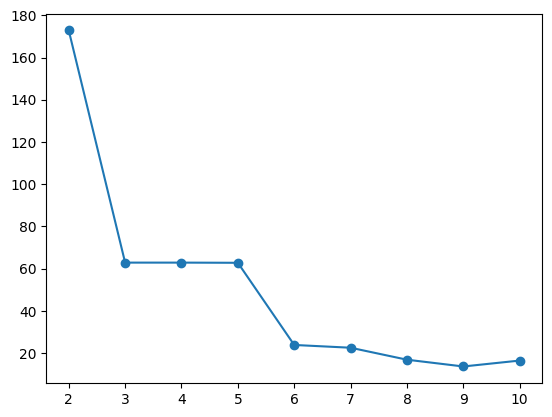

In [59]:
import matplotlib.pyplot as plt


plt.plot(range(2,11), inertias, marker='o')